Number of samples: 5


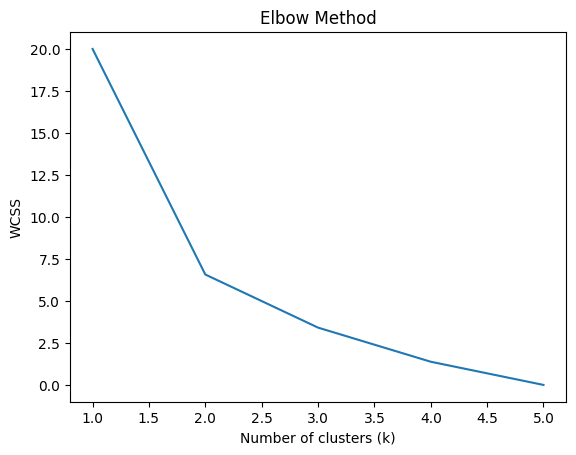

   mall_id mall_name           location  total_area_sqft  stores_count  \
0        1    Mall A        City Center           200000            50   
1        2    Mall B            Suburbs           150000            35   
2        3    Mall C           Downtown           180000            40   
3        4    Mall D       Near Airport           220000            55   
4        5    Mall E  Shopping District           170000            45   

   annual_revenue_million  parking_spaces  Cluster  
0                      50             500        2  
1                      40             300        0  
2                      45             350        0  
3                      60             600        2  
4                      55             450        1  


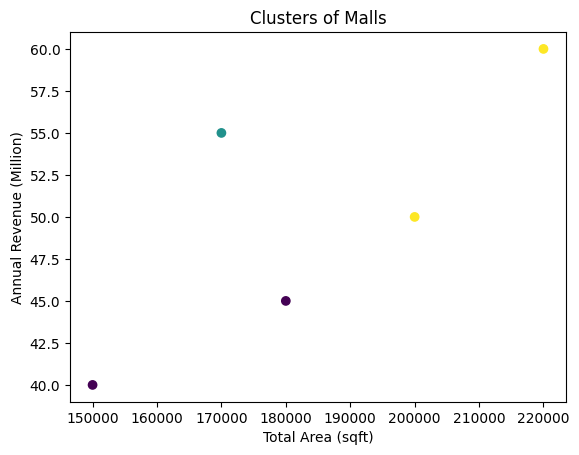

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the malls dataset
df = pd.read_csv('malls.csv')

# Select relevant numerical features for clustering
features = df[['total_area_sqft', 'stores_count', 'annual_revenue_million', 'parking_spaces']]

# Check the number of rows in the dataset
n_samples = df.shape[0]
print(f"Number of samples: {n_samples}")

# Normalize features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to determine the optimal number of clusters
wcss = []  # List for storing WCSS values
max_clusters = min(10, n_samples)  # Ensure we don't try more clusters than available samples
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# After determining the optimal k, let's say it is 3 (example)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the final dataset with cluster assignments
print(df)

# Visualize the clusters (if 2D or 3D projection is suitable)
plt.scatter(df['total_area_sqft'], df['annual_revenue_million'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters of Malls')
plt.xlabel('Total Area (sqft)')
plt.ylabel('Annual Revenue (Million)')
plt.show()


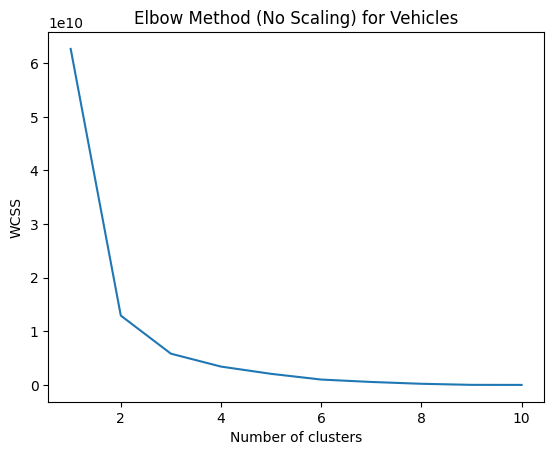

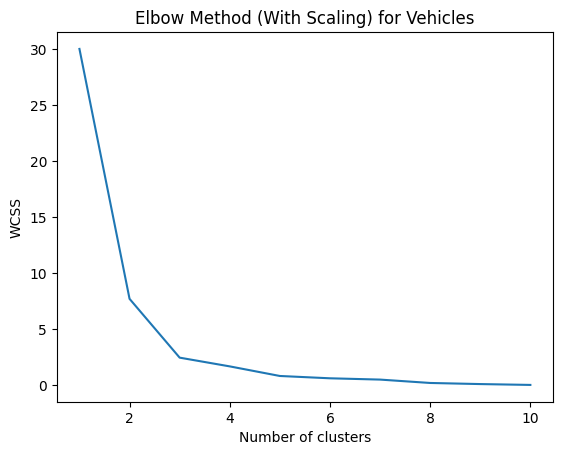

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample vehicle data
data = {
    'vehicle_serial_no': [5, 3, 8, 2, 4, 7, 6, 10, 1, 9],
    'mileage': [150000, 120000, 250000, 80000, 100000, 220000, 180000, 300000, 75000, 280000],
    'fuel_efficiency': [15, 18, 10, 22, 20, 12, 16, 8, 24, 9],
    'maintenance_cost': [5000, 4000, 7000, 2000, 3000, 6500, 5500, 8000, 1500, 7500],
    'vehicle_type': ['SUV', 'Sedan', 'Truck', 'Hatchback', 'Sedan', 'Truck', 'SUV', 'Truck', 'Hatchback', 'SUV']
}

# Create a DataFrame
df = pd.DataFrame(data)
# Drop the 'vehicle_type' since it is categorical
X_vehicles = df.drop(columns=['vehicle_serial_no', 'vehicle_type'])

# Elbow method without scaling
wcss_vehicles = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_vehicles)
    wcss_vehicles.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_vehicles)
plt.title('Elbow Method (No Scaling) for Vehicles')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Apply KMeans without scaling
kmeans_vehicles_noscale = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters_vehicles_noscale = kmeans_vehicles_noscale.fit_predict(X_vehicles)
df['Cluster_Vehicles_No_Scaling'] = clusters_vehicles_noscale
# Scale all features
scaler = StandardScaler()
X_vehicles_scaled = scaler.fit_transform(X_vehicles)

# Elbow method with scaling
wcss_vehicles_scaled = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_vehicles_scaled)
    wcss_vehicles_scaled.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_vehicles_scaled)
plt.title('Elbow Method (With Scaling) for Vehicles')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Apply KMeans with scaling
kmeans_vehicles_scaled = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters_vehicles_scaled = kmeans_vehicles_scaled.fit_predict(X_vehicles_scaled)
df['Cluster_Vehicles_With_Scaling'] = clusters_vehicles_scaled


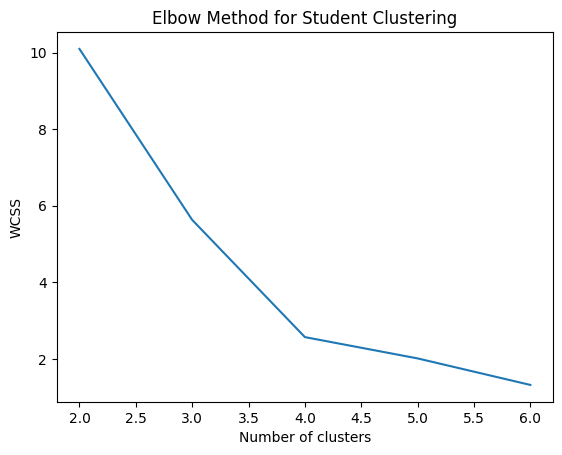

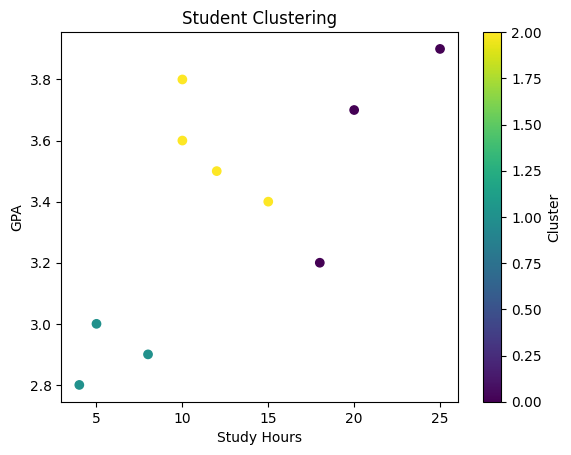

   student_id  GPA  study_hours  attendance_rate  Cluster
0           1  3.8           10               90        2
1           2  3.4           15               85        2
2           3  2.9            8               80        1
3           4  3.7           20               95        0
4           5  3.5           12               88        2
5           6  3.0            5               70        1
6           7  3.9           25              100        0
7           8  2.8            4               75        1
8           9  3.2           18               90        0
9          10  3.6           10               92        2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample student data
student_data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'GPA': [3.8, 3.4, 2.9, 3.7, 3.5, 3.0, 3.9, 2.8, 3.2, 3.6],
    'study_hours': [10, 15, 8, 20, 12, 5, 25, 4, 18, 10],
    'attendance_rate': [90, 85, 80, 95, 88, 70, 100, 75, 90, 92]
}

# Create a DataFrame
df_students = pd.DataFrame(student_data)
# Selecting relevant features for clustering (GPA, study_hours, attendance_rate)
X_students = df_students[['GPA', 'study_hours', 'attendance_rate']]

# Scaling features
scaler = StandardScaler()
X_students_scaled = scaler.fit_transform(X_students)
# Elbow Method to determine the optimal number of clusters (K)
wcss_students = []
for i in range(2, 7):  # Range of K between 2 and 6
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_students_scaled)
    wcss_students.append(kmeans.inertia_)

plt.plot(range(2, 7), wcss_students)
plt.title('Elbow Method for Student Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Applying KMeans with K=3 (from elbow analysis)
kmeans_students = KMeans(n_clusters=3, init='k-means++', random_state=42)
students_clusters = kmeans_students.fit_predict(X_students_scaled)

df_students['Cluster'] = students_clusters
# Scatter plot to visualize clusters (GPA vs Study Hours)
plt.scatter(df_students['study_hours'], df_students['GPA'], c=df_students['Cluster'], cmap='viridis')
plt.title('Student Clustering')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.colorbar(label='Cluster')
plt.show()
# Displaying the final dataset with assigned clusters
print(df_students[['student_id', 'GPA', 'study_hours', 'attendance_rate', 'Cluster']])
